In [131]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload
!pip install PIL
!pip install image
!pip install rembg
!pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 4.1.1 which is incompatible.
scikit-image 0.19.3 requires pillow!=7.1.0,!=7.1.1,!=8.3.0,>=6.1.0, but you have pillow 4.1.1 which is incompatible.
rembg 2.0.25 requires pillow==9.2.0, but you have pillow 4.1.1 which is incompatible.
pymatting 1.1.8 requires pillow>=5.2.0, but you have pillow 4.1.1 which is incompatible.
fastai 2.7.10 requires pillow>6.0.0, but you have pillow 4.1.1 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import cv2
from google.colab.patches import cv2_imshow
from rembg import remove 
from PIL import Image 
import numpy as np

In [133]:

img1 = Image.open(r"/content/background.jpeg")
img2 = Image.open(r"/content/person_image_without_bg.png")
#img1.paste(img2, (0,0), mask = img2)
#img1.save('test.png')

In [29]:
img1.paste(img2)
img1.save('test.png')

In [30]:
type(img1)

PIL.JpegImagePlugin.JpegImageFile

In [61]:
def remove_bg(x):
    image_path = x
    output_path = 'person_image_without_bg.png'
    input_image = cv2.imread(x)
    #cv2_imshow(input_image)
    output = remove(input_image)
    cv2.imwrite(output_path,output)
    #cv2_imshow(output)
    return output

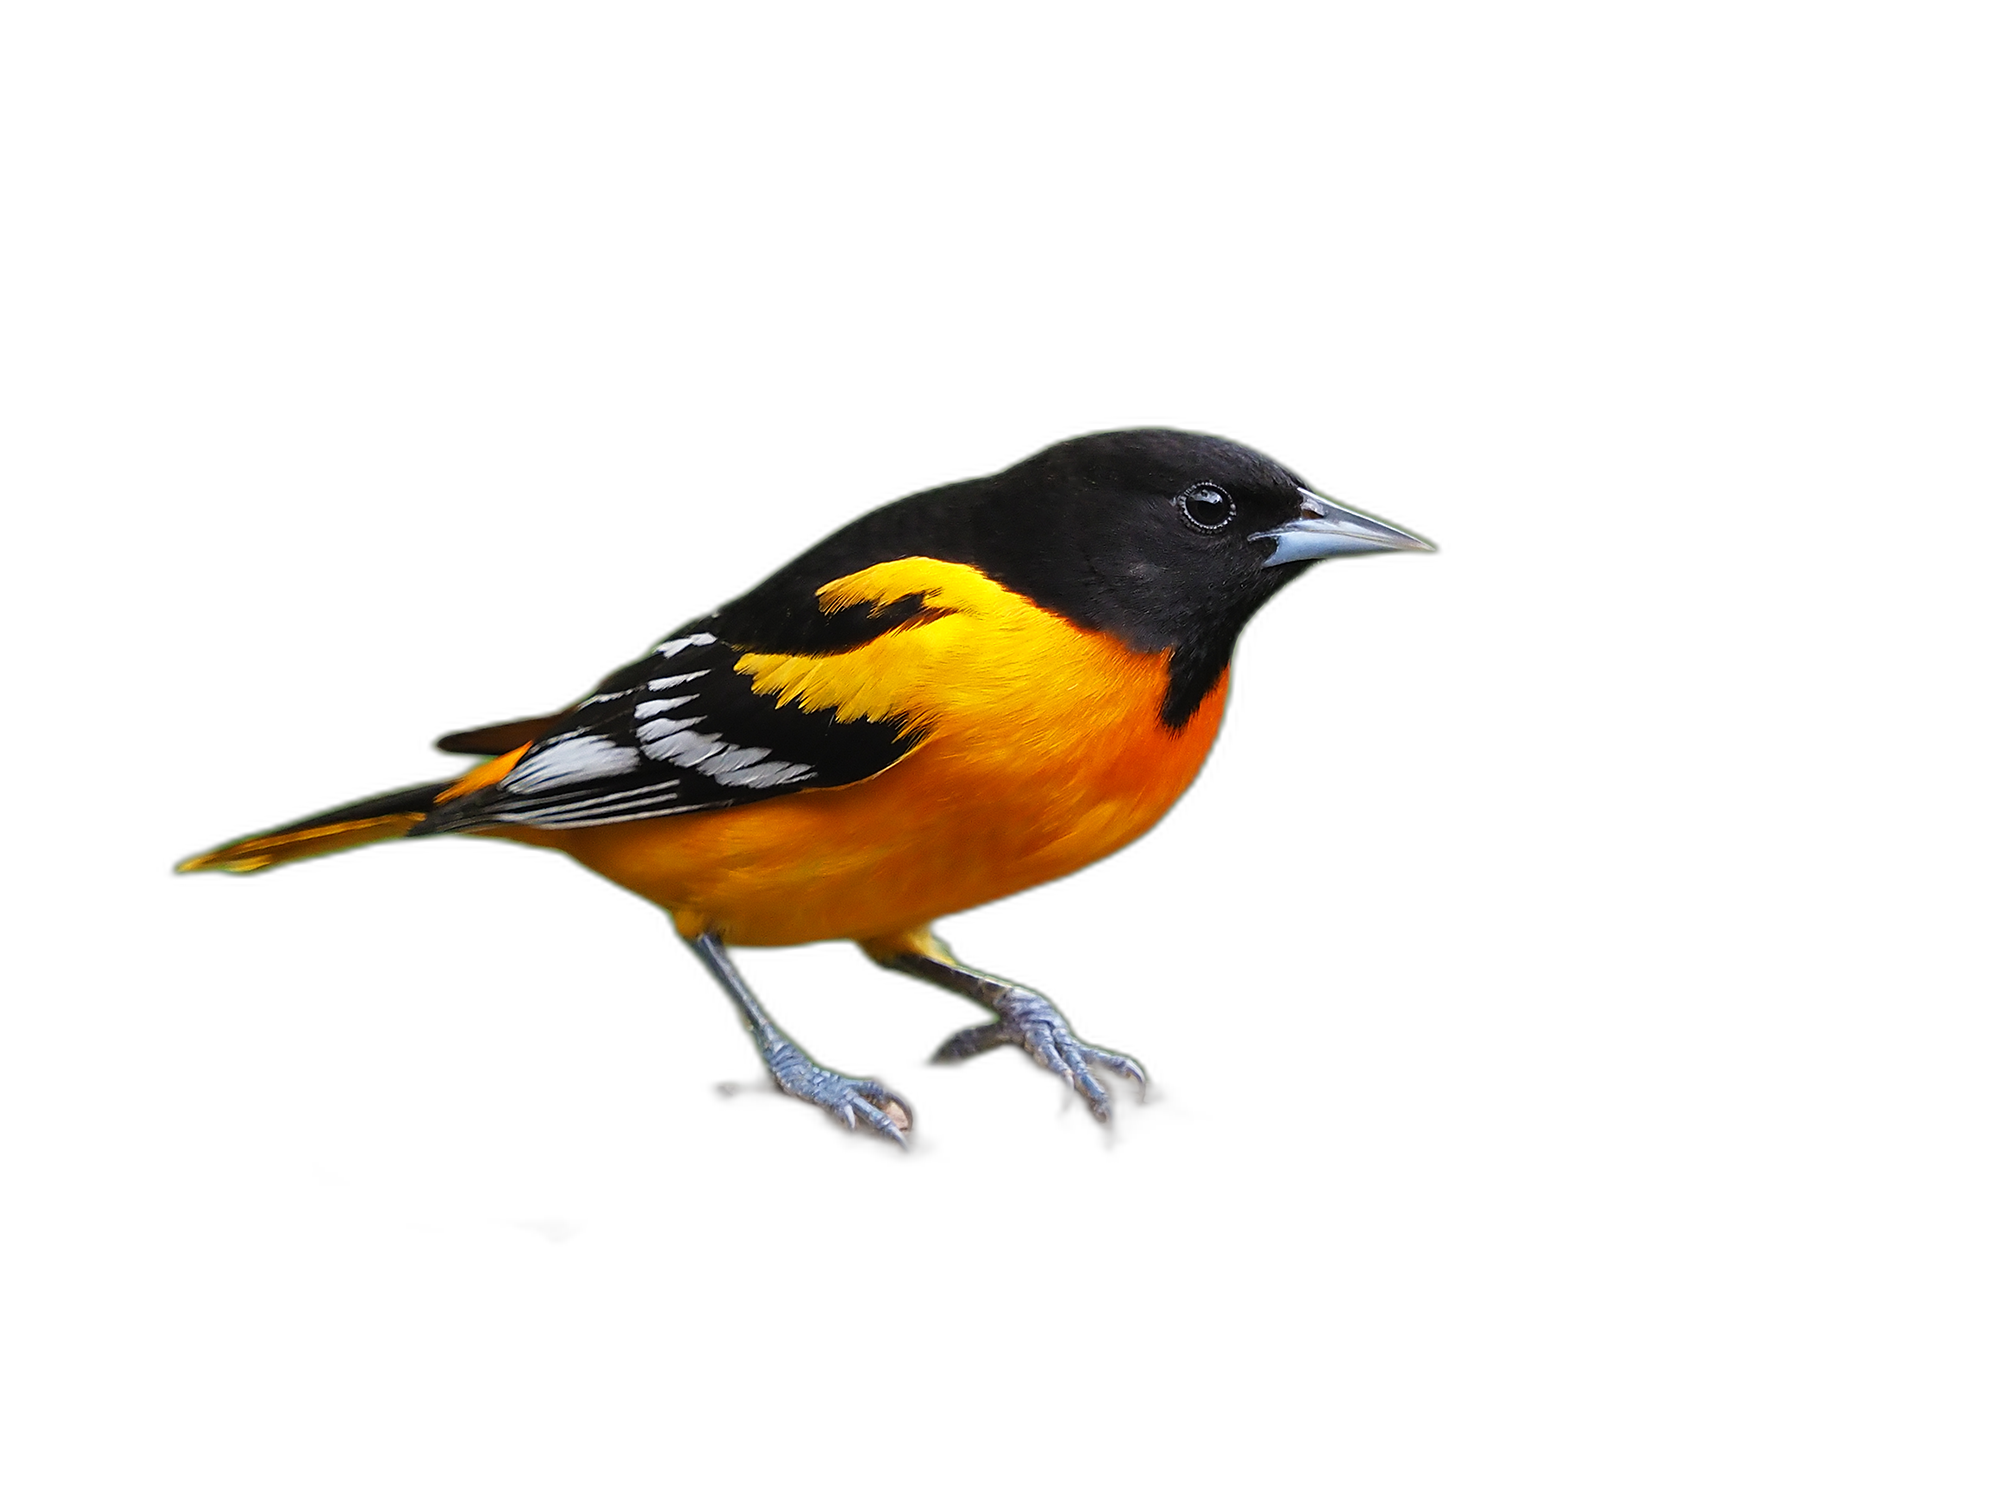

In [134]:
cv2_imshow(remove_bg('/content/bird.png'))

In [63]:
def add_bg(bg_path, person_path):
    im1 = Image.open(bg_path)
    im2 = Image.open(person_path)
    im1.paste(im2, (0,0), mask = im2)
    im1.save('who.png')

In [135]:
add_bg('/content/background.jpeg', '/content/person_image_without_bg.png')

In [136]:
for i in range(10, 30, 2) : 
    print(i)
    img = color_quantization(img1, i)
    cv2_imshow(img)

10


AttributeError: ignored

In [137]:
import sys
import matplotlib.pyplot as plt

In [138]:
def cartoonify(ImagePath):
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    
    # check if the image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    
    ReSized1 = cv2.resize(originalmage, (960, 540))
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    
    #retrieving the edges for cartoon effect
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
      cv2.ADAPTIVE_THRESH_MEAN_C, 
      cv2.THRESH_BINARY, 9, 9)
    
    ReSized4 = cv2.resize(getEdge, (960, 540))
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))

    
    #Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    plt.show()
    return images



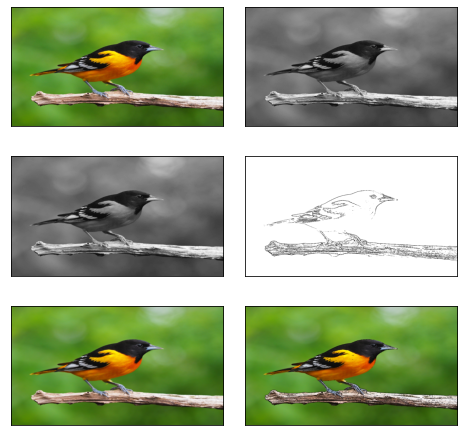

In [139]:
p = cartoonify('/content/bird.png')

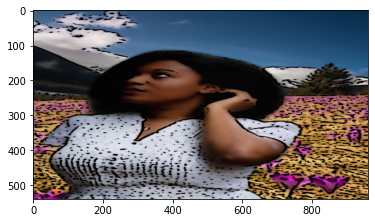

In [128]:
# fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(images[i], cmap='gray')
#     plt.show()
plt.imshow(p[5], cmap = 'gray');

In [106]:
p

array([[[ 59,  93, 128],
        [ 59,  93, 128],
        [ 59,  93, 128],
        ...,
        [ 10,  42,  71],
        [ 10,  42,  71],
        [ 11,  42,  71]],

       [[ 59,  93, 128],
        [ 59,  93, 128],
        [ 59,  93, 128],
        ...,
        [ 10,  42,  71],
        [ 10,  42,  71],
        [ 10,  42,  71]],

       [[ 60,  94, 129],
        [ 60,  94, 129],
        [ 60,  94, 129],
        ...,
        [  8,  43,  71],
        [  8,  43,  71],
        [  8,  43,  71]],

       ...,

       [[166,  34, 151],
        [166,  34, 150],
        [166,  35, 150],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[165,  36, 150],
        [165,  36, 150],
        [165,  36, 150],
        ...,
        [101,  73,  39],
        [101,  74,  39],
        [102,  74,  39]],

       [[164,  36, 150],
        [164,  36, 150],
        [165,  37, 150],
        ...,
        [178, 128,  66],
        [181, 131,  68],
        [182, 132,  69]]